### Part III: Comparing the carbon intensity across countries/continents

#### Objectives: 

- Calculate the average CI with respect to all countries, or group countries in a logical way if neccesary 
- examine if the assumptions for statistical tests hold true (e.g. normal distribution for ANOVA)
- conduct statistical test to find out whether there are significant differences between countries/groups of countries 
- formulate hypothesis regarding the reasons for differences if any 


##### Step one: Loading and checking the data set
- **Objective:** Load the first sheet of the dataset and perform basic quality checks.
- **Steps:**
  1. Load the first worksheet into a DataFrame using `pandas`.
  2. Display an overview of the dataset (first few rows, data types, missing values, unique values, summary statistics).
- **Purpose:** Ensure the dataset is ready for analysis and identify any immediate issues like missing data or unexpected values.

In [32]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = "PublicTablesForCarbonCatalogueDataDescriptor_v30Oct2021.xlsx"
data = pd.ExcelFile(file_path)

# Load the first sheet into a DataFrame
main_data = data.parse(data.sheet_names[0])  # Load only the first sheet

# Display the first few rows
print("Preview of the first few rows of the dataset:")
display(main_data.head())

# Basic data quality checks

# 1. Check data types
print("Data types of each column:")
display(main_data.dtypes)

# 2. Check for missing values
print("Number of missing values per column:")
display(main_data.isnull().sum())

# 3. Get unique value counts for each column
print("Number of unique values per column:")
display(main_data.nunique())

# 4. Get summary statistics
print("Summary statistics of the dataset:")
display(main_data.describe(include='all'))


Preview of the first few rows of the dataset:


,*PCF-ID,Year of reporting,*Stage-level CO2e available,Product name (and functional unit),Product detail,Company,Country (where company is incorporated),Company's GICS Industry Group,Company's GICS Industry,*Company's sector,...,Relative change in PCF vs previous,Company-reported reason for change,*Change reason category,*%Upstream estimated from %Operations,*Upstream CO2e (fraction of total PCF),*Operations CO2e (fraction of total PCF),*Downstream CO2e (fraction of total PCF),*Transport CO2e (fraction of total PCF),*EndOfLife CO2e (fraction of total PCF),*Adjustments to raw data (if any)
0,10056-1-2014,2014,Yes,Frosted Flakes(R) Cereal,"Frosted Flakes(R), 23 oz., Produced in Lancast...",Kellogg Company,USA,"Food, Beverage & Tobacco",Food Products,Food & Beverage,...,(not reported by company),N/a,N/a (no %change reported),No,0.575,0.3,0.125,0.045,(included in downstream but not reported separ...,Divided stage and total emissions by 1000 (bas...
1,10056-1-2015,2015,Yes,"Frosted Flakes, 23 oz, produced in Lancaster, ...",Cereal,Kellogg Company,USA,Food & Beverage Processing,Not used for 2015 reporting,Food & Beverage,...,(not reported by company),N/a,N/a (no %change reported),No,0.575,0.3,0.125,0.045,(included in downstream but not reported separ...,Divided stage and total emissions by 1000 (bas...
2,10222-1-2013,2013,Yes,Office Chair,Field not included in 2013 data,KNOLL INC,USA,Capital Goods,Building Products,Comm. equipm. & capital goods,...,(not reported by company),N/a,N/a (no previous data available),Yes,0.8063,0.1736,0.0201,(included in up/downstream but not reported se...,0,"Changed %change to zero, according to field ""c..."
3,10261-1-2017,2017,Yes,Multifunction Printers,bizhub C458,"Konica Minolta, Inc.",Japan,Technology Hardware & Equipment,"Electronic Equipment, Instruments & Components","Computer, IT & telecom",...,(not reported by company),N/a,N/a (no previous data available),No,0.3065,0.0551,0.6384,0.0101,0.0276,NaN
4,10261-2-2017,2017,Yes,Multifunction Printers,bizhub C558,"Konica Minolta, Inc.",Japan,Technology Hardware & Equipment,"Electronic Equipment, Instruments & Components","Computer, IT & telecom",...,(not reported by company),N/a,N/a (no previous data available),No,0.2508,0.0451,0.7041,0.0083,0.0226,NaN


Data types of each column:


*PCF-ID                                       object
Year of reporting                              int64
*Stage-level CO2e available                   object
Product name (and functional unit)            object
Product detail                                object
Company                                       object
Country (where company is incorporated)       object
Company's GICS Industry Group                 object
Company's GICS Industry                       object
*Company's sector                             object
Product weight (kg)                          float64
*Source for product weight                    object
Product's carbon footprint (PCF, kg CO2e)    float64
*Carbon intensity                            float64
Protocol used for PCF                         object
Relative change in PCF vs previous            object
Company-reported reason for change            object
*Change reason category                       object
*%Upstream estimated from %Operations         

Number of missing values per column:


*PCF-ID                                        0
Year of reporting                              0
*Stage-level CO2e available                    0
Product name (and functional unit)             0
Product detail                                10
Company                                        0
Country (where company is incorporated)        0
Company's GICS Industry Group                  0
Company's GICS Industry                        0
*Company's sector                              0
Product weight (kg)                            0
*Source for product weight                     0
Product's carbon footprint (PCF, kg CO2e)      0
*Carbon intensity                              0
Protocol used for PCF                          0
Relative change in PCF vs previous             0
Company-reported reason for change             0
*Change reason category                        0
*%Upstream estimated from %Operations          0
*Upstream CO2e (fraction of total PCF)         0
*Operations CO2e (fr

Number of unique values per column:


*PCF-ID                                      866
Year of reporting                              5
*Stage-level CO2e available                    2
Product name (and functional unit)           672
Product detail                               496
Company                                      145
Country (where company is incorporated)       28
Company's GICS Industry Group                 30
Company's GICS Industry                       35
*Company's sector                              8
Product weight (kg)                          340
*Source for product weight                     2
Product's carbon footprint (PCF, kg CO2e)    626
*Carbon intensity                            548
Protocol used for PCF                         26
Relative change in PCF vs previous           145
Company-reported reason for change           157
*Change reason category                        6
*%Upstream estimated from %Operations          3
*Upstream CO2e (fraction of total PCF)       338
*Operations CO2e (fr

Summary statistics of the dataset:


,*PCF-ID,Year of reporting,*Stage-level CO2e available,Product name (and functional unit),Product detail,Company,Country (where company is incorporated),Company's GICS Industry Group,Company's GICS Industry,*Company's sector,...,Relative change in PCF vs previous,Company-reported reason for change,*Change reason category,*%Upstream estimated from %Operations,*Upstream CO2e (fraction of total PCF),*Operations CO2e (fraction of total PCF),*Downstream CO2e (fraction of total PCF),*Transport CO2e (fraction of total PCF),*EndOfLife CO2e (fraction of total PCF),*Adjustments to raw data (if any)
count,866,866.000000,866,866,856,866,866,866,866,866,...,866,866,866,866,866,866,866,866,866,187
unique,866,NaN,2,672,496,145,28,30,35,8,...,145,157,6,3,338,317,276,208,122,58
top,9792-2-2017,NaN,No,Residential Air Conditioner,Field not included in 2013 data,Daimler AG,USA,Technology Hardware & Equipment,Not used for 2015 reporting,"Computer, IT & telecom",...,(not reported by company),N/a,N/a (no %change reported),N/a (product with insufficient stage-level data),N/a (product with insufficient stage-level data),N/a (product with insufficient stage-level data),N/a (product with insufficient stage-level data),N/a (product with insufficient stage-level data),N/a (product with insufficient stage-level data),Concatenated fields product name and product d...
freq,1,NaN,445,4,97,37,305,195,215,253,...,616,654,482,445,445,445,445,445,445,29
mean,NaN,2014.762125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,1.236720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2014.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Interpretation: 

- the data quality seems appropiate 
- numeric columns consist of appropiates data types (floats)
- there are no N/a values in columns of interest 
- we can already see that we have 28 unique countries to aggregate on

##### Step two: Understanding the distribution of values across countries
- **Objective:** Determine the unique countries in the dataset and visualize the number of entries per country.
- **Steps:**
  1. Use `value_counts()` to count occurrences of each unique country in the `Country` column.
  2. Display the counts for clarity.
  3. Create a bar plot to visualize the frequency of entries for each country.
- **Purpose:** Understand the geographic distribution of the data, which can help identify any imbalances or regional trends.




Number of unique countries and their respective counts:


Country (where company is incorporated)
USA               305
Japan             110
Germany            67
Taiwan             60
Netherlands        35
Finland            35
United Kingdom     32
Switzerland        28
Sweden             26
Italy              23
South Korea        22
France             20
Brazil             17
India              16
Spain              13
South Africa       11
Belgium             8
China               6
Canada              6
Ireland             6
Australia           6
Malaysia            4
Chile               3
Colombia            2
Luxembourg          2
Lithuania           1
Indonesia           1
Greece              1
Name: count, dtype: int64

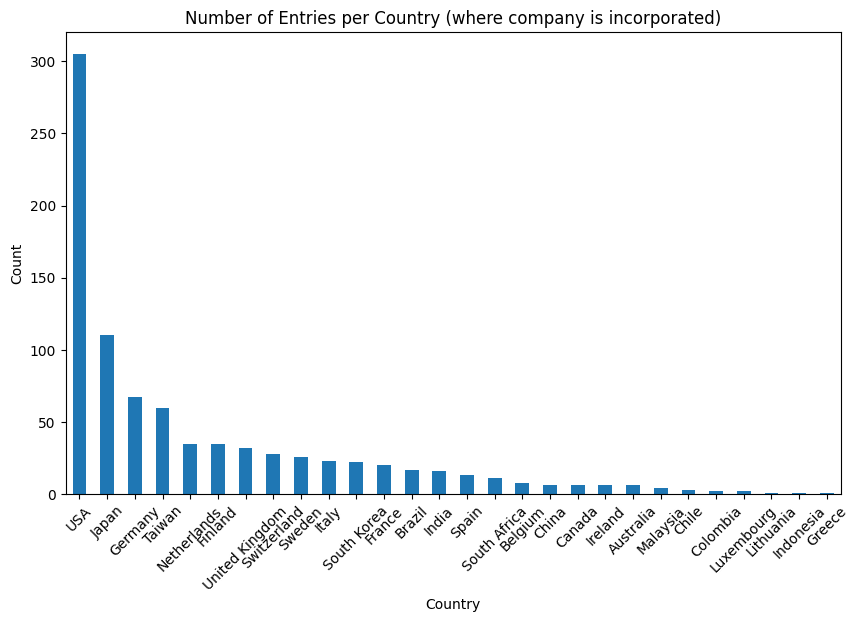

In [33]:
# Identify unique countries and their counts
print("Number of unique countries and their respective counts:")
country_counts = main_data['Country (where company is incorporated)'].value_counts()
display(country_counts)

# Plot the counts as a bar plot
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar')
plt.title('Number of Entries per Country (where company is incorporated)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


##### Interpretation: 

- One can already see that we will run into issues when using statistical test like ANOVA, since the distribution between is very uneven. While USA, Japan, Germany and Taiwan have a lot of values. However, Greece, Indonesia and others have only few values.
- We could drop all countries with less than 30 values, but that would shrink the information density in the data set. A better alternative would be to group the countries logically. 
- Since we do not know where the clients of EcoFuture Analytics are situated, we can not really estimate which countries are most imporant with respect to our clients. One could assume that most clients will be situated in the biggest economies in the dataset (USA, Japan, Germany) and all other countries will be "slightly" less important. 
- Therefore we could build groups of countries, if they have less than 30 values by allocating them to their respective geographic reason.

### Step three: Building bigger groups
- **Objective:** Group countries with fewer than 30 entries into regional categories (e.g., "Europe Others") while preserving countries with 30 or more entries.
- **Steps:**
  1. Map each country to a continent using a predefined dictionary.
  2. Countries with fewer than 30 entries are assigned to their continent-specific "Others" group.
  3. Display the new distribution and visualize it in a bar plot.
- **Purpose:** Ensure statistically meaningful group sizes for ANOVA, while maintaining logical geographic groupings.



New group distribution:


Grouped Country
USA                     305
Japan                   110
Europe Others            74
Germany                  67
Taiwan                   60
Asia Others              49
Netherlands              35
Finland                  35
United Kingdom           32
Switzerland              28
Sweden                   26
South America Others     22
Africa Others            11
North America Others      6
Oceania Others            6
Name: count, dtype: int64

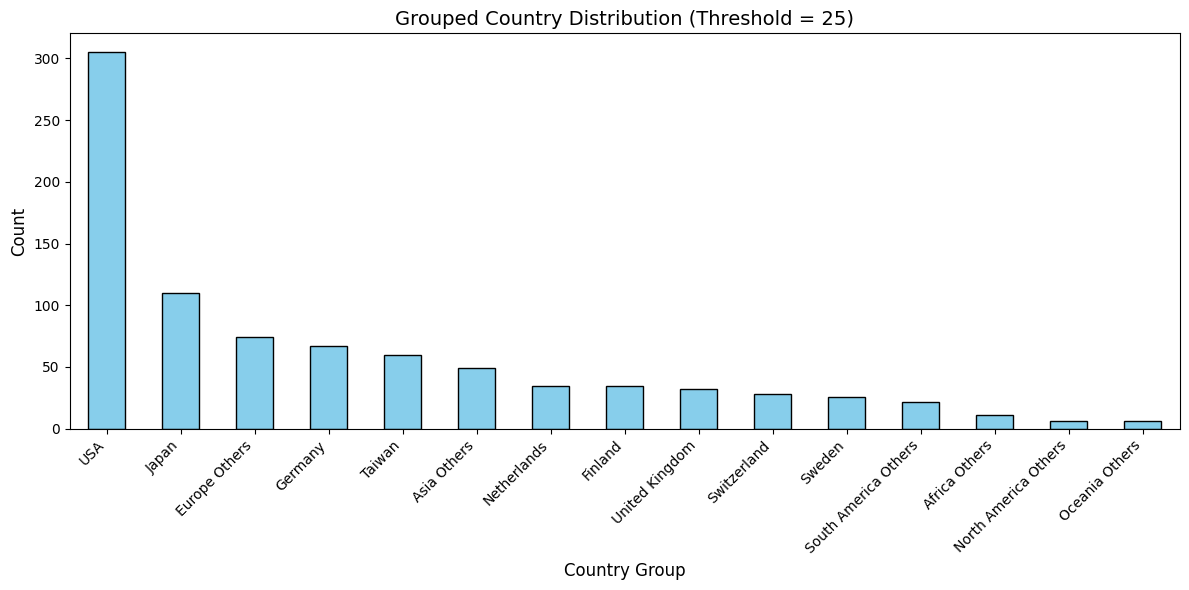

In [34]:
# Define the threshold for grouping
threshold = 25

# Define a mapping for countries to continents
continent_mapping = {
    'USA': 'North America',
    'Japan': 'Asia',
    'Germany': 'Europe',
    'Taiwan': 'Asia',
    'Netherlands': 'Europe',
    'Finland': 'Europe',
    'United Kingdom': 'Europe',
    'Switzerland': 'Europe',
    'Sweden': 'Europe',
    'Italy': 'Europe',
    'South Korea': 'Asia',
    'France': 'Europe',
    'Brazil': 'South America',
    'India': 'Asia',
    'Spain': 'Europe',
    'South Africa': 'Africa',
    'Belgium': 'Europe',
    'China': 'Asia',
    'Canada': 'North America',
    'Ireland': 'Europe',
    'Australia': 'Oceania',
    'Malaysia': 'Asia',
    'Chile': 'South America',
    'Colombia': 'South America',
    'Luxembourg': 'Europe',
    'Lithuania': 'Europe',
    'Indonesia': 'Asia',
    'Greece': 'Europe'
}

# Create a new column with grouped countries
def group_countries(country):
    count = country_counts.get(country, 0)
    if count >= threshold:
        return country
    else:
        continent = continent_mapping.get(country, 'Other')
        return f"{continent} Others"

main_data['Grouped Country'] = main_data['Country (where company is incorporated)'].apply(group_countries)

# Verify the new group distribution
print("New group distribution:")
group_distribution = main_data['Grouped Country'].value_counts()
display(group_distribution)

# Plot the new group distribution with adjusted label alignment
plt.figure(figsize=(12, 6))
group_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Grouped Country Distribution (Threshold = 25)', fontsize=14)
plt.xlabel('Country Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate and align labels to the right
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()



##### Interpretation 

- The grouping helps in creating bigger groups. 
- Still some groups are very small. When interpretating the results in the end, we should be aware, that those groups are to small in terms of values. So interpretation with respect to those groups will be limited

#### Step four: Checking core assumptions for statistical tests like ANOVA
- **Objective:** Assess the data properties for statistical tests related to the `Carbon intensity` column.
- **Steps:**
  1. **Boxplots:** Visualize the distribution of `Carbon intensity` for each group to check for similar variance and normality.
  2. **Residuals:**
     - Calculate residuals by subtracting the overall mean from each observation in `Carbon intensity`.
     - Plot a histogram of these residuals to check for the normality of the entire model.
  3. **Group Residuals:**
     - Group the residuals by country and plot histograms side by side to assess the normality within each group.
- **Purpose:** Ensure the data meets the assumptions for statistical tests such as ANOVA, including similar variances and normality of residuals.


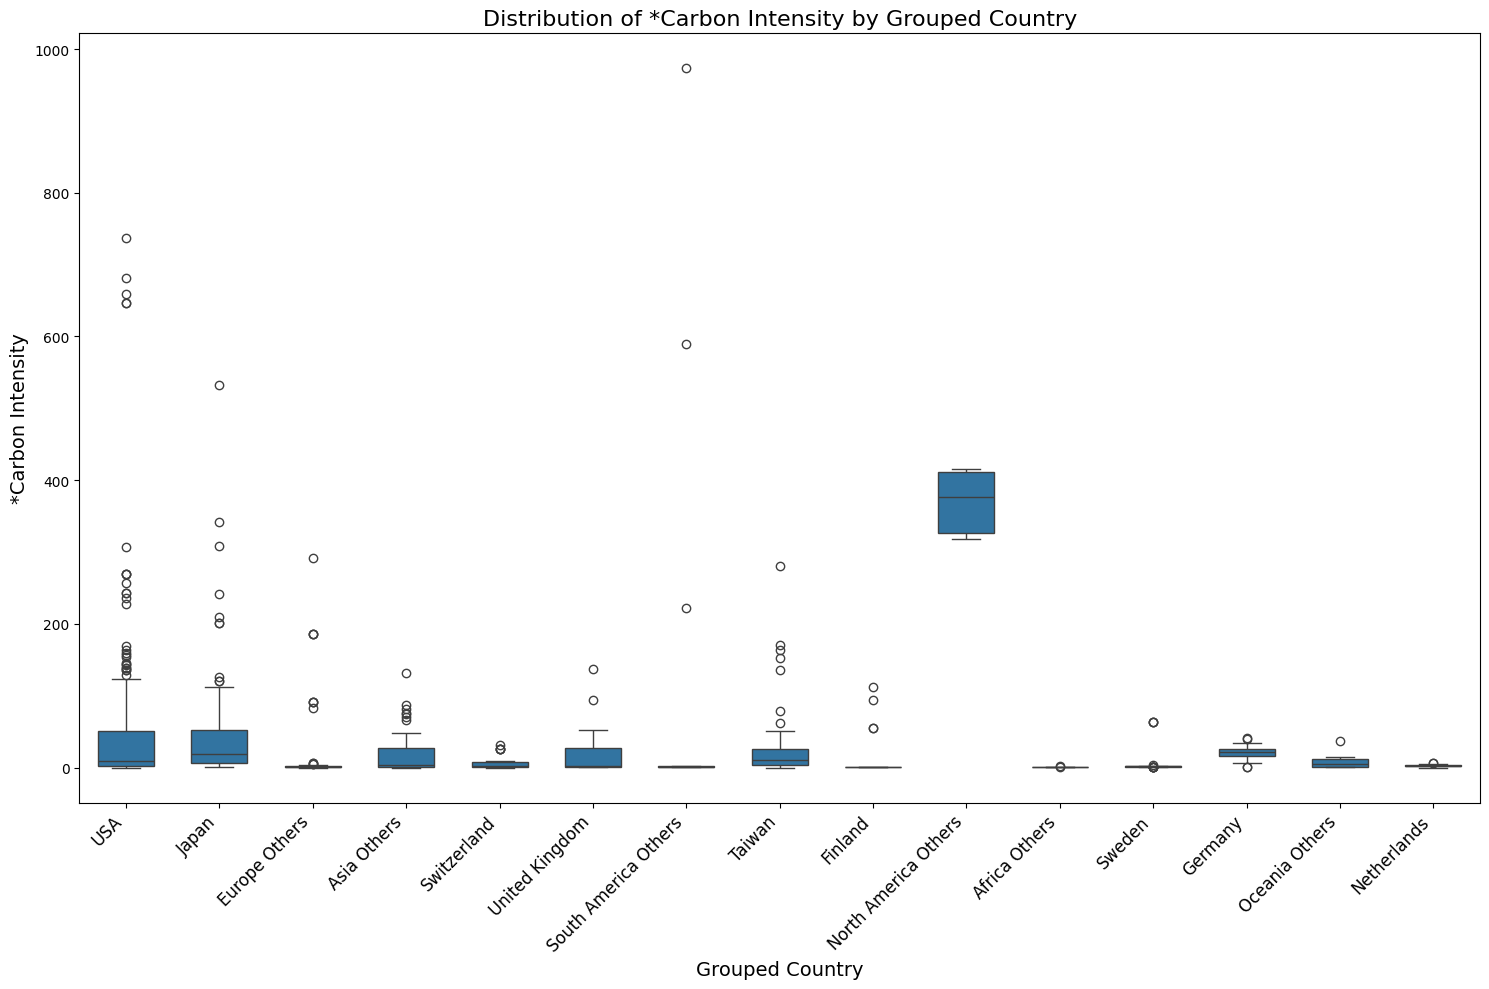

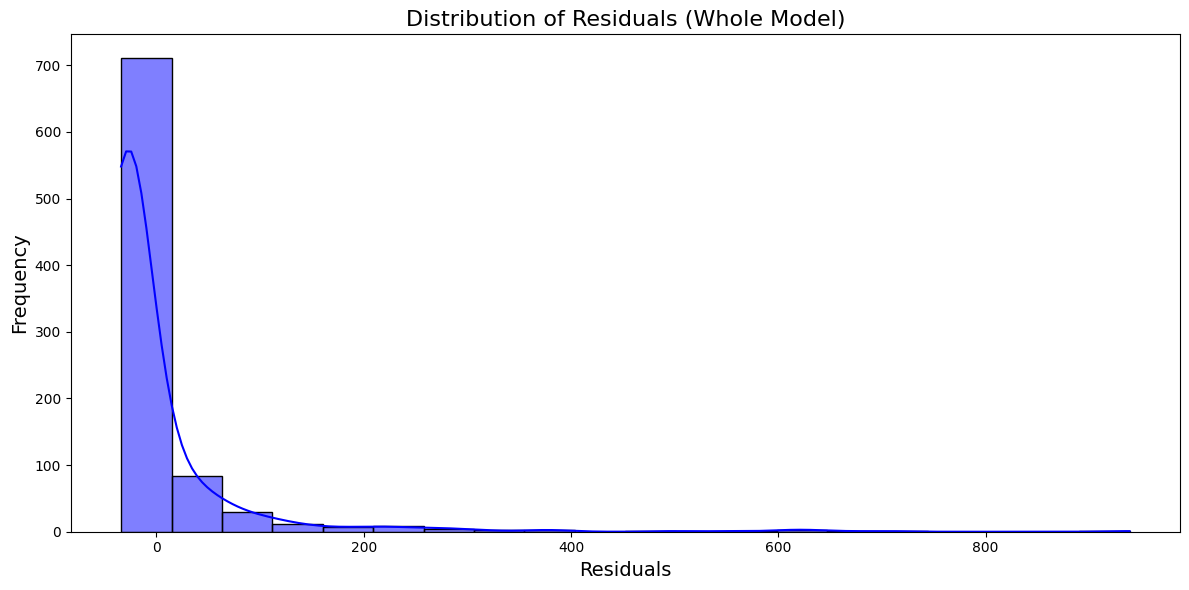

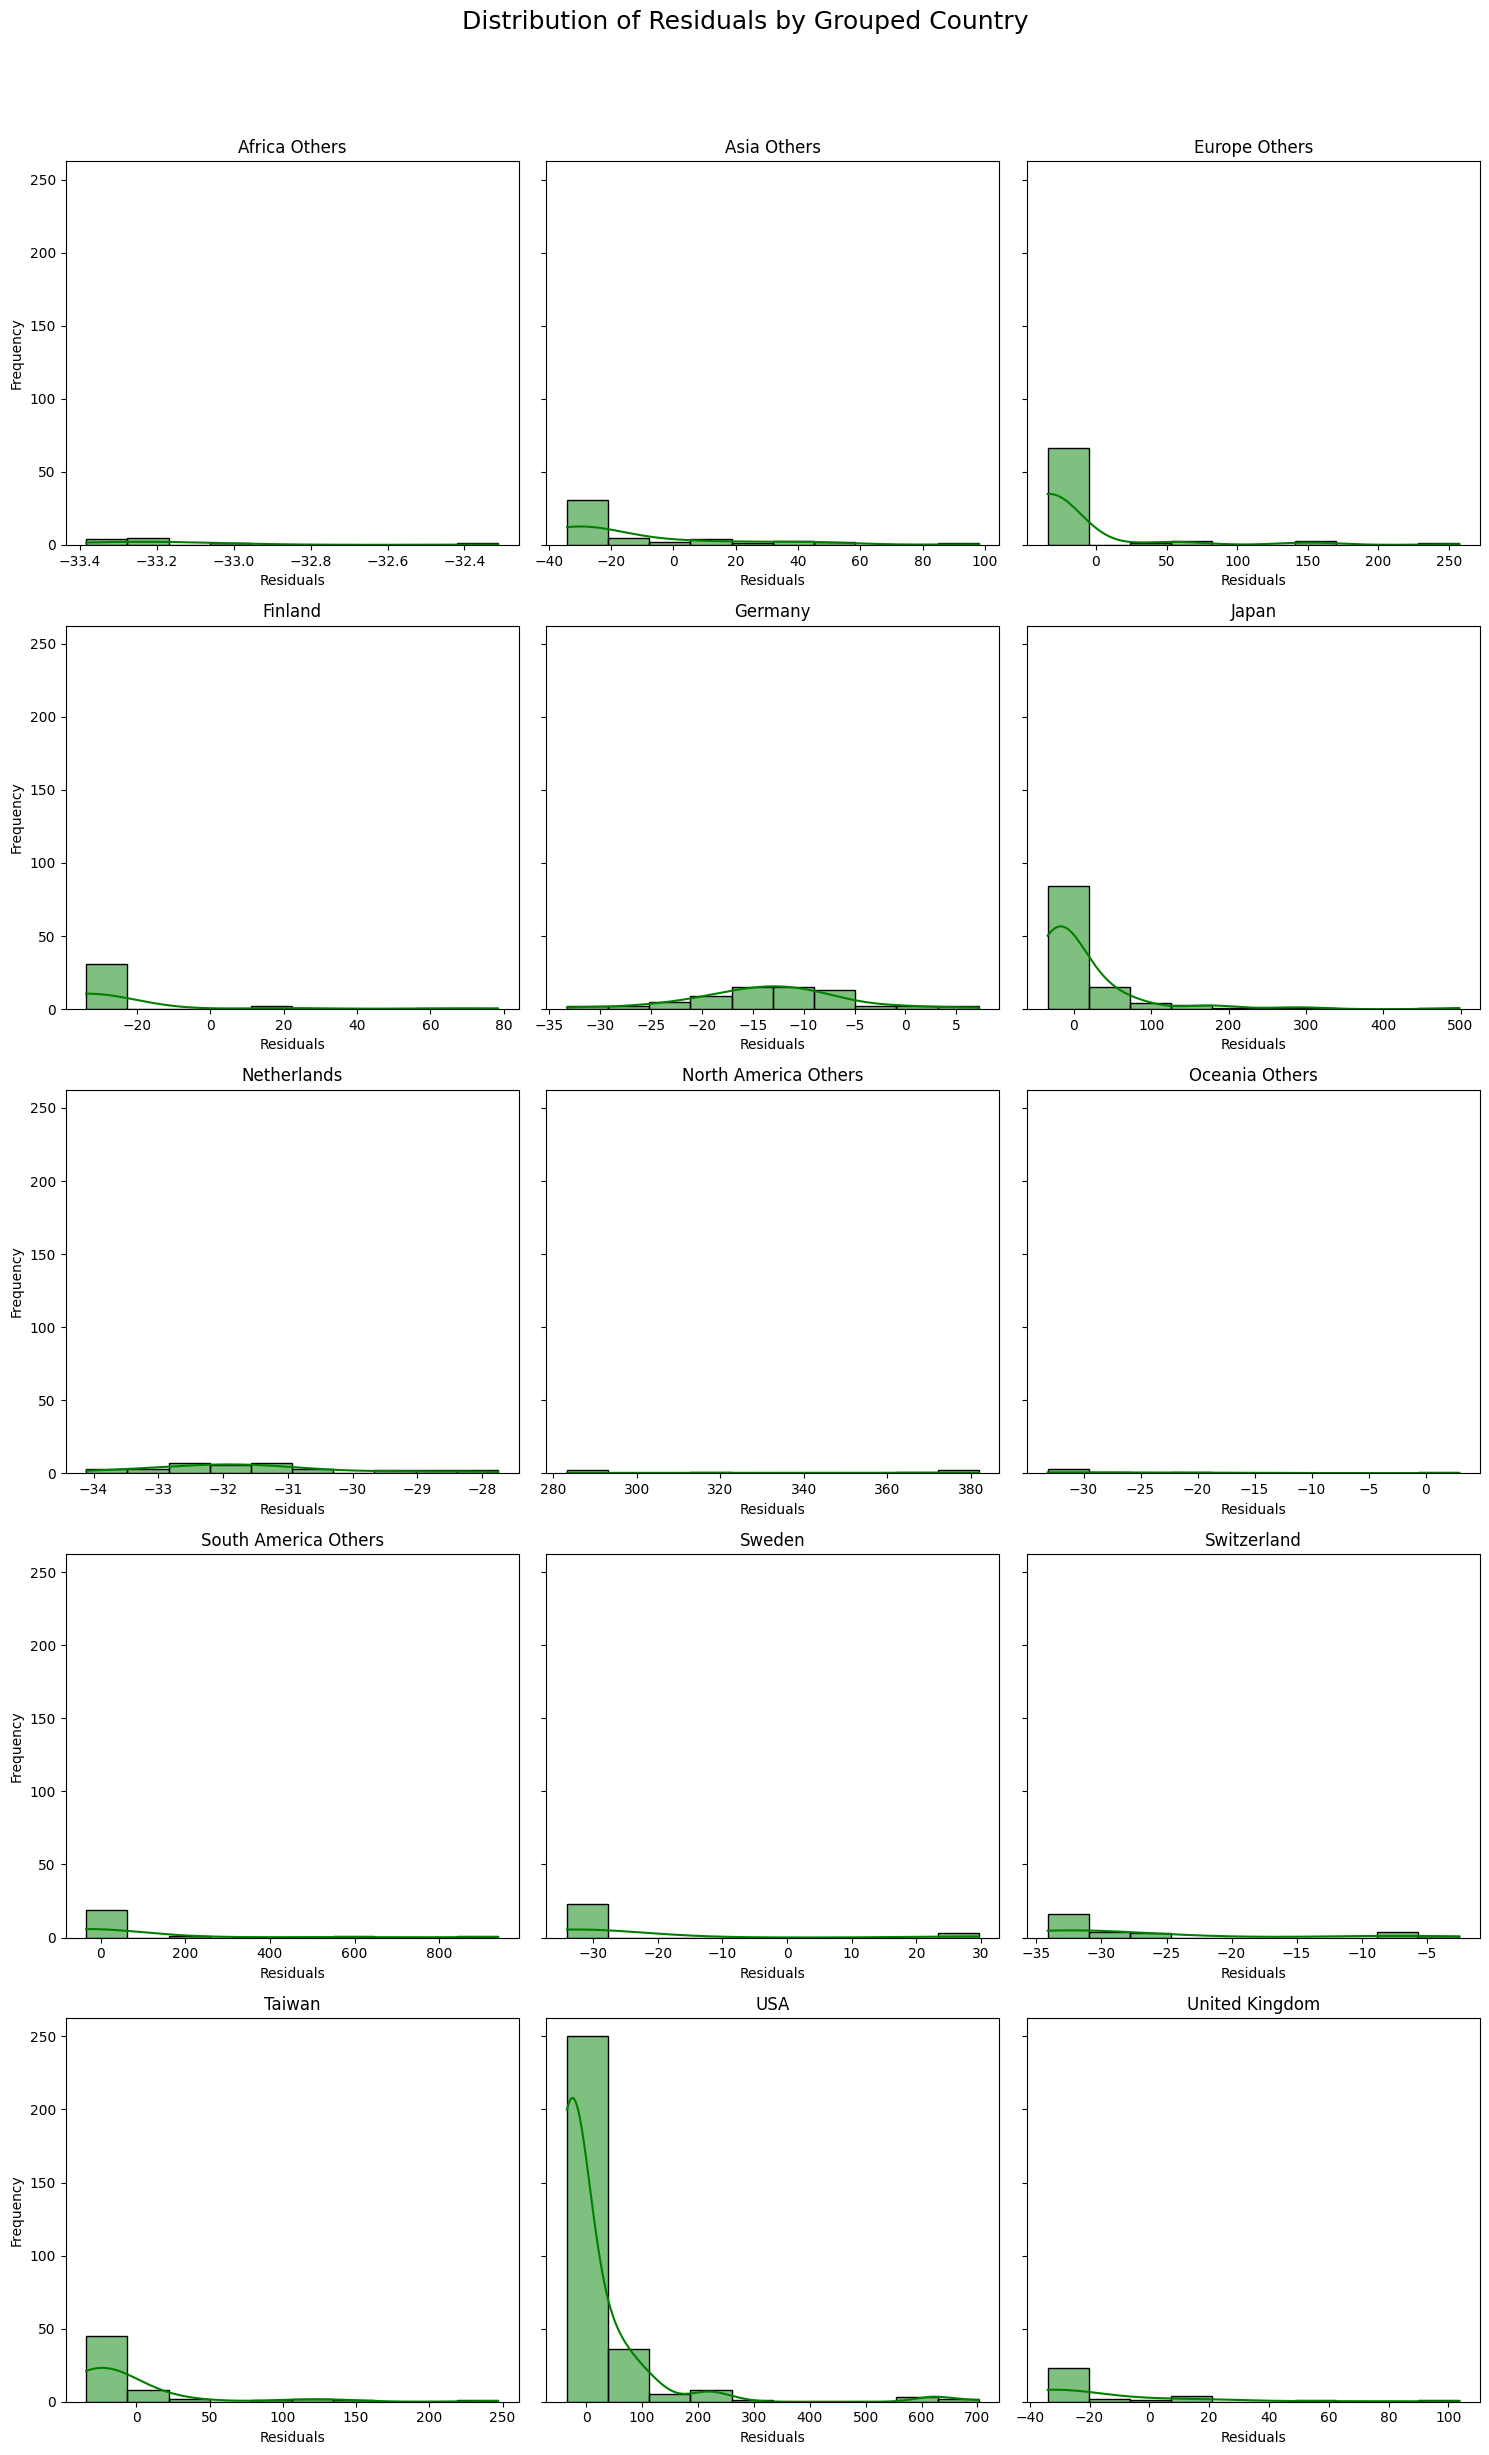

Summary table of each group's statistics:


,Grouped Country,mean,variance,std_dev
0,Africa Others,1.106364,0.084665,0.290973
1,Asia Others,20.764490,919.639421,30.325557
2,Europe Others,17.612838,2699.850903,51.960090
3,Finland,9.669714,716.462068,26.766809
4,Germany,20.763582,58.250648,7.632211
5,Japan,44.831364,5813.141783,76.243962
6,Netherlands,2.706571,2.529206,1.590348
7,North America Others,370.148333,2193.847657,46.838527
8,Oceania Others,10.500000,198.753560,14.097998
9,South America Others,82.125455,56941.583626,238.624357


In [35]:
# Check if the required column exists
if '*Carbon intensity' not in main_data.columns:
    print("The column '*Carbon intensity' is missing from the dataset.")
else:
    # Boxplot: Distribution of Carbon Intensity for each group
    plt.figure(figsize=(15, 10))  # Increased figure size
    sns.boxplot(data=main_data, x='Grouped Country', y='*Carbon intensity', width=0.6)
    plt.title('Distribution of *Carbon Intensity by Grouped Country', fontsize=16)
    plt.xlabel('Grouped Country', fontsize=14)
    plt.ylabel('*Carbon Intensity', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.tight_layout()
    plt.show()

    # Calculate residuals for the whole model
    overall_mean = main_data['*Carbon intensity'].mean()
    main_data['Residuals'] = main_data['*Carbon intensity'] - overall_mean

    # Histogram: Residuals of the whole model
    plt.figure(figsize=(12, 6))  # Increased figure size
    sns.histplot(main_data['Residuals'], kde=True, bins=20, color='blue', edgecolor='black')
    plt.title('Distribution of Residuals (Whole Model)', fontsize=16)
    plt.xlabel('Residuals', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.tight_layout()
    plt.show()

    # Histogram: Residuals for each group
    grouped_residuals = main_data.groupby('Grouped Country')['Residuals']

    # Adjusted layout for individual group histograms
    n_groups = len(grouped_residuals)
    n_cols = 3  # Number of columns for the grid
    n_rows = (n_groups + n_cols - 1) // n_cols  # Calculate required rows

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows), sharey=True)
    fig.suptitle('Distribution of Residuals by Grouped Country', fontsize=18)

    # Flatten axes array for easier iteration
    axes = axes.flatten()

    for i, (group, residuals) in enumerate(grouped_residuals):
        sns.histplot(residuals, kde=True, bins=10, color='green', edgecolor='black', ax=axes[i])
        axes[i].set_title(group, fontsize=12)
        axes[i].set_xlabel('Residuals', fontsize=10)
        axes[i].set_ylabel('Frequency', fontsize=10)

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout for title space
    plt.show()

    # Summary table: mean, variance, and standard deviation for each group
    summary_table = main_data.groupby('Grouped Country')['*Carbon intensity'].agg(
        mean='mean',
        variance='var',
        std_dev='std'
    ).reset_index()

    print("Summary table of each group's statistics:")
    display(summary_table)


##### Interpretation 

- Test for homogenity of variances: variances differ a lot, so this assumption is violated 
- Test for normality of residuals: nearly all distributions in the groups are highly skewed. This assumption is also violated. 
- additionally the sample size between groups still differs significantly 
- We will have to proceed with a different statistical test than the "normal" ANOVA
- One could now decide to group differently for example by continent. But then the information density will be shrinked a lot. 
- Furthermore we can also see that the mean between groups is highly different, with North America (excluding the USA) in first position. 

##### Step five: Checking for significant differences
- **Objective:** Perform Welch's ANOVA to test for significant differences in the means of `*Carbon intensity` across groups, accounting for unequal variances and group sizes.
- **Steps:**
  1. **Data Preparation:** Filter the dataset to include only `Grouped Country` (independent variable) and `*Carbon intensity` (dependent variable). Remove rows with missing values to ensure valid calculations.
  2. **Model Fitting:** Use the ordinary least squares (OLS) model to estimate group means and variances.
     - Apply the `robust='hc3'` option to correct for heteroscedasticity (unequal variances).
  3. **Welch’s ANOVA Test:** Conduct the ANOVA test using the fitted model and extract the p-value to determine statistical significance.
- **Purpose:** Welch’s ANOVA is a robust alternative to traditional ANOVA, suitable for datasets with unequal variances and/or group sizes.


In [36]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ensure the required column exists
if '*Carbon intensity' not in main_data.columns:
    print("The column '*Carbon intensity' is missing from the dataset.")
else:
    # Step 1: Prepare the data and rename columns
    clean_data = main_data[['Grouped Country', '*Carbon intensity']].dropna()
    clean_data = clean_data.rename(columns={
        '*Carbon intensity': 'Carbon_intensity', 
        'Grouped Country': 'Grouped_Country'
    })

    # Step 2: Perform Welch’s ANOVA
    formula = 'Carbon_intensity ~ C(Grouped_Country)'  # Match renamed columns
    model = ols(formula, data=clean_data).fit()
    welch_anova = sm.stats.anova_lm(model, typ=2, robust='hc3')  # Use robust HC3 for heteroscedasticity
    print("Welch's ANOVA Results:")
    display(welch_anova)

    # Step 3: Interpret the Results
    # Use .iloc[0] to access the first p-value by position
    p_value = welch_anova['PR(>F)'].iloc[0]
    if p_value < 0.05:
        print(f"Significant differences found between groups (p = {p_value:.4f}).")
    else:
        print(f"No significant differences found between groups (p = {p_value:.4f}).")


Welch's ANOVA Results:


,sum_sq,df,F,PR(>F)
C(Grouped_Country),5.760656e+06,14.0,66.647689,2.907430e-126
Residual,5.253979e+06,851.0,NaN,NaN


Significant differences found between groups (p = 0.0000).


##### Intrepration: 

- Welch's ANOVA shows that the differences between groups are significant. This is not surprising because we could already see that in the boxplot. 

##### Step six: Examining differences between groups
- **Objective:** Compare how groups differ from each other after Welch's ANOVA by performing a pairwise comparison.
- **Method:** Use the **Games-Howell post-hoc test**, which is robust to unequal variances and group sizes.
- **Steps:**
  1. **Data Preparation:**
     - Filter the dataset to include only the dependent variable (`*Carbon intensity`) and the grouping variable (`Grouped Country`).
     - Rename columns to avoid issues with special characters or spaces.
  2. **Perform Games-Howell Test:**
     - Use the `pairwise_gameshowell()` function from the `pingouin` library to compare all possible pairs of groups.
     - Compute p-values for each pairwise comparison, adjusted for Type I error.
  3. **Display Results:**
     - The results table shows mean differences, standard errors, test statistics, and adjusted p-values.

In [37]:
import pingouin as pg

# Ensure the required column exists
if '*Carbon intensity' not in main_data.columns:
    print("The column '*Carbon intensity' is missing from the dataset.")
else:
    # Step 1: Prepare the data and rename columns
    clean_data = main_data[['Grouped Country', '*Carbon intensity']].dropna()
    clean_data = clean_data.rename(columns={
        '*Carbon intensity': 'Carbon_intensity',
        'Grouped Country': 'Grouped_Country'
    })

    # Step 2: Perform the Games-Howell test
    posthoc_results = pg.pairwise_gameshowell(
        data=clean_data,
        dv='Carbon_intensity',   # Dependent variable
        between='Grouped_Country'  # Independent variable (grouping)
    )

    # Step 3: Display the results
    print("Games-Howell Post-Hoc Test Results:")
    display(posthoc_results)


Games-Howell Post-Hoc Test Results:


,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Africa Others,Asia Others,1.106364,20.764490,-19.658126,4.333111,-4.536724,48.039339,3.098933e-03,-0.703308
1,Africa Others,Europe Others,1.106364,17.612838,-16.506474,6.040875,-2.732464,73.030780,3.071073e-01,-0.335666
2,Africa Others,Finland,1.106364,9.669714,-8.563351,4.525267,-1.892342,34.025556,8.409098e-01,-0.357698
3,Africa Others,Germany,1.106364,20.763582,-19.657218,0.936541,-20.989165,67.139032,0.000000e+00,-2.736134
4,Africa Others,Japan,1.106364,44.831364,-43.725000,7.270106,-6.014355,109.031728,2.501564e-06,-0.595433
...,...,...,...,...,...,...,...,...,...,...
100,Switzerland,USA,6.869286,45.086623,-38.217337,5.947338,-6.425957,329.158131,4.799881e-08,-0.404065
101,Switzerland,United Kingdom,6.869286,17.763125,-10.893839,5.916737,-1.841190,37.960991,8.661228e-01,-0.444910
102,Taiwan,USA,29.098000,45.086623,-15.988623,8.674435,-1.843189,160.088809,8.765225e-01,-0.172689
103,Taiwan,United Kingdom,29.098000,17.763125,11.334875,8.653483,1.309863,87.820709,9.920746e-01,0.247863


In [38]:
# Filter results where p-value is significant
significant_results = posthoc_results[posthoc_results['pval'] < 0.05]
print("Significant Pairwise Comparisons:")
display(significant_results)


Significant Pairwise Comparisons:


,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Africa Others,Asia Others,1.106364,20.764490,-19.658126,4.333111,-4.536724,48.039339,3.098933e-03,-0.703308
3,Africa Others,Germany,1.106364,20.763582,-19.657218,0.936541,-20.989165,67.139032,0.000000e+00,-2.736134
4,Africa Others,Japan,1.106364,44.831364,-43.725000,7.270106,-6.014355,109.031728,2.501564e-06,-0.595433
5,Africa Others,Netherlands,1.106364,2.706571,-1.600208,0.282772,-5.659008,40.082453,1.270075e-04,-1.119526
6,Africa Others,North America Others,1.106364,370.148333,-369.041970,19.121950,-19.299390,5.000211,1.470025e-04,-12.952464
11,Africa Others,Taiwan,1.106364,29.098000,-27.991636,6.594856,-4.244465,59.020877,6.244861e-03,-0.586164
12,Africa Others,USA,1.106364,45.086623,-43.980259,5.636407,-7.802889,304.146814,1.040190e-11,-0.453051
18,Asia Others,Netherlands,20.764490,2.706571,18.057918,4.340555,4.160279,48.369328,9.690883e-03,0.770406
19,Asia Others,North America Others,20.764490,370.148333,-349.383844,19.606362,-17.819922,5.524951,1.048967e-04,-10.680678
31,Europe Others,North America Others,17.612838,370.148333,-352.535495,20.053073,-17.580123,6.043483,5.605603e-05,-6.760019


##### Interpretation 

- this table is only helpful if there are specific case where a client wants to know if there is a significant difference between pairwise groups.
- We can see that a lot of pairs differ significantly between each other. We can also see the respective means, which makes it really clear. 

### Overall Interpretation for policy makers and limitations

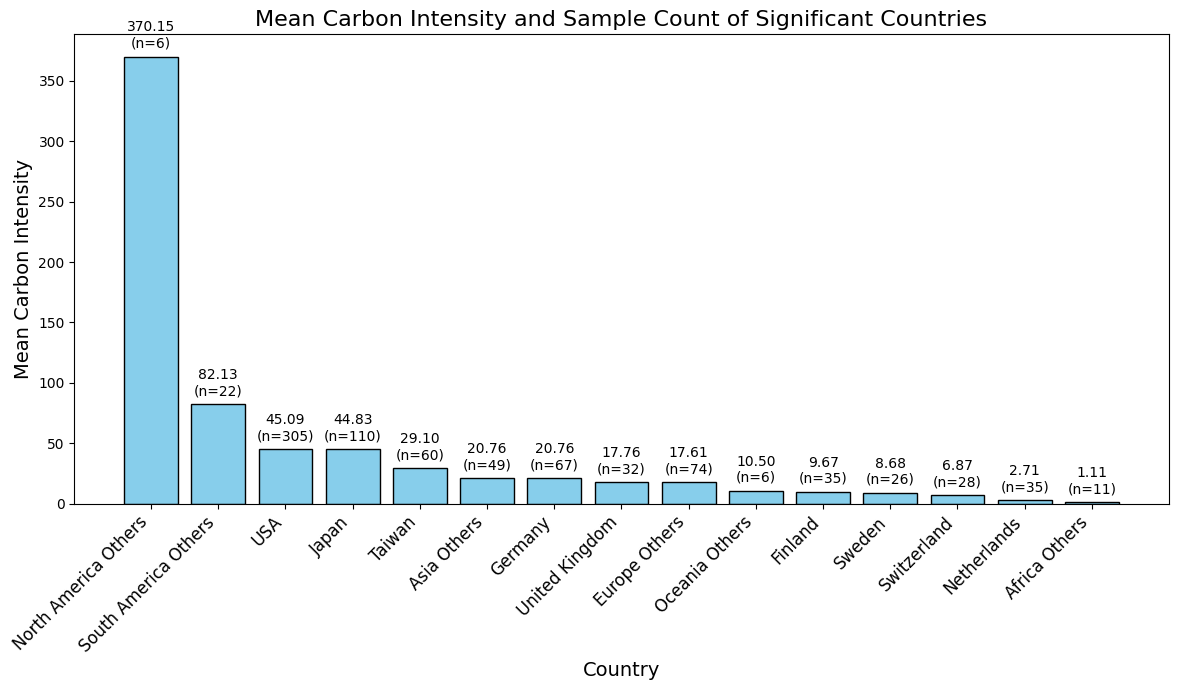

In [39]:
import matplotlib.pyplot as plt

# Step 1: Filter significant results
significant_results = posthoc_results[posthoc_results['pval'] < 0.05]

# Step 2: Extract unique countries from significant comparisons
unique_countries = set(significant_results['A']).union(set(significant_results['B']))

# Step 3: Calculate means and counts for these countries
country_means = clean_data.groupby('Grouped_Country')['Carbon_intensity'].mean()
country_counts = clean_data.groupby('Grouped_Country')['Carbon_intensity'].count()

# Step 4: Filter and sort the means and counts for only the significant countries
significant_means = country_means[country_means.index.isin(unique_countries)].sort_values(ascending=False)
significant_counts = country_counts[significant_means.index]

# Step 5: Plot the means as a bar chart
plt.figure(figsize=(12, 7))
bars = plt.bar(significant_means.index, significant_means.values, color='skyblue', edgecolor='black')

# Add value labels to each bar
for bar, count in zip(bars, significant_counts):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Center the text on the bar
        height + 5,  # Slightly above the bar
        f'{height:.2f}\n(n={count})',  # Format to include mean and count
        ha='center', va='bottom', fontsize=10
    )

# Add chart details
plt.title('Mean Carbon Intensity and Sample Count of Significant Countries', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Mean Carbon Intensity', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


### Key Findings and Limitations

#### Significant Differences Across Groups:
- **Welch’s ANOVA** confirmed that there are significant differences in *Carbon Intensity* between groups (p-value from ANOVA = \(2.91 \times 10^{-126}\)).
- The post-hoc analysis revealed specific pairwise differences, with **37 significant comparisons** (p < 0.05).

#### Groups with High Differences:
- **North America Others** stands out as a major outlier, consistently showing significantly higher *Carbon Intensity* compared to almost all other groups (e.g., Netherlands, Japan, Oceania Others).
- **USA, Japan, and Germany** also display relatively high *Carbon Intensity*, with significant differences compared to lower-intensity groups like **Netherlands, Switzerland, and Sweden**.
- Groups like **Africa Others, Oceania Others, and Switzerland** generally show low *Carbon Intensity* and are often significantly different from high-intensity groups.

---

### 2. Possible Reasons for the Differences

#### a. Industrialization Level and Energy Mix
- **North America Others and USA:**
  - Likely reflects high-carbon industries and reliance on fossil fuels for energy.
  - Large-scale industrial activities, including resource extraction and manufacturing, drive high emissions.
- **Europe Others, Netherlands, and Switzerland:**
  - Lower *Carbon Intensity* may result from cleaner energy sources (e.g., renewables, nuclear) and stringent environmental regulations.

#### b. Nature of Products
- High-intensity regions may focus on producing energy-intensive goods, such as heavy machinery, automobiles, or chemicals.
- Low-intensity regions may produce less energy-demanding goods, such as textiles or services.

#### c. Regulations and Sustainability Initiatives
- **Europe (e.g., Germany, Netherlands):**
  - Stringent regulations on emissions and higher adoption of energy-efficient technologies may lower *Carbon Intensity*.
- **Developing regions (e.g., Africa Others):**
  - Limited industrial activities and cleaner supply chains contribute to lower intensity but may also reflect lower economic output.

#### d. Economic Development Stage
- **Developed regions (e.g., USA, Japan):**
  - Higher industrial activity and energy demand, leading to higher emissions.
- **Developing regions (e.g., Africa Others):**
  - Fewer emissions due to limited industrialization.

---

### 3. Strategic Insights

#### Regions Requiring Attention:
- **North America Others, USA, and Japan** should be targeted for carbon reduction strategies, as they consistently show high *Carbon Intensity*.
- These regions may benefit from:
  - Transitioning to renewable energy.
  - Implementing stricter emissions standards.
  - Encouraging carbon offset programs.

#### Benchmarks for Low Emissions:
- Groups like **Netherlands, Switzerland, and Sweden** demonstrate significantly lower *Carbon Intensity* and could serve as benchmarks for sustainability practices.

---

### 4. Challenges in Interpretation

#### Aggregate Data:
- The analysis uses aggregate data per region, which may mask intra-regional variations (e.g., emissions vary across states or industries).
- The decision for one approach of grouping the countries may have an significant influence on the output. 

#### Underlying Factors Not Captured:
- Factors such as trade, raw material sourcing, and supply chain complexity are not directly analyzed but may influence *Carbon Intensity*.

---

### Overall Interpretation

#### Big Picture:
- The results confirm that *Carbon Intensity* varies significantly between regions, driven by differences in industrial activity, energy sources, and regulations.

#### Actionable Insights:
- High-emission groups like **North America Others** and **USA** require immediate intervention, while low-emission regions like **Switzerland** and **Netherlands** offer valuable models for sustainable practices.
```